In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader

In [2]:
train_photos = np.load('train_photos.npy')
train_labels = np.load('train_labels.npy')
test_photos = np.load('test_photos.npy')
test_labels = np.load('test_labels.npy')
img_files = np.load('img_files.npy')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(train_photos, train_labels, test_size = .2, random_state = 42)
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
test_cat = np_utils.to_categorical(test_labels)
del train_photos, train_labels

In [5]:
def VGG():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                     activation = 'relu', padding = 'same',
                     input_shape = (224, 224, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),
                     activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
#     model.add(Conv2D(filters = 128, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 128, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 128, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),
#                      activation = 'relu', padding = 'same'))
#     model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Flatten())
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 32, activation = 'relu'))
    model.add(Dense(units = 3, activation = 'softmax'))
    opt = Adam(learning_rate = 0.001)
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [10]:
model = VGG()
es = EarlyStopping(monitor = 'val_accuracy', patience = 10)
aug = ImageDataGenerator(rescale = 1.0/255.0, 
                         rotation_range = 45,
                         brightness_range = [0.2, 0.9],
                         horizontal_flip = True,
                         vertical_flip = True)
history = model.fit(aug.flow(X_train, y_train_cat, batch_size = 32), 
                    steps_per_epoch = len(X_train)//32, 
                    validation_data = (X_test, y_test_cat), 
                    validation_steps = len(X_test)//32, 
                    validation_batch_size = 32,
                    use_multiprocessing = True,
                    epochs = 1000,
                    callbacks = [es])

Epoch 1/1000
62/62 [==============================] - 110s 2s/step - loss: 0.9365 - accuracy: 0.5672 - val_loss: 81.0951 - val_accuracy: 0.7688
Epoch 2/1000
62/62 [==============================] - 121s 2s/step - loss: 0.4439 - accuracy: 0.8192 - val_loss: 22.8142 - val_accuracy: 0.9083
Epoch 3/1000
62/62 [==============================] - 121s 2s/step - loss: 0.2760 - accuracy: 0.9035 - val_loss: 17.1557 - val_accuracy: 0.9646
Epoch 4/1000
62/62 [==============================] - 117s 2s/step - loss: 0.1492 - accuracy: 0.9535 - val_loss: 48.7548 - val_accuracy: 0.9000
Epoch 5/1000
62/62 [==============================] - 115s 2s/step - loss: 0.1224 - accuracy: 0.9657 - val_loss: 15.6567 - val_accuracy: 0.9521
Epoch 6/1000
62/62 [==============================] - 115s 2s/step - loss: 0.0965 - accuracy: 0.9697 - val_loss: 5.0988 - val_accuracy: 0.9812
Epoch 7/1000
62/62 [==============================] - 115s 2s/step - loss: 0.0840 - accuracy: 0.9732 - val_loss: 7.7548 - val_accuracy: 0

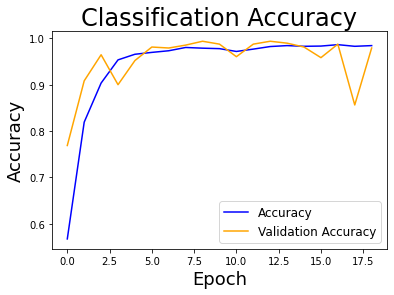

In [11]:
#plt.subplot(211)
#plt.plot(ep.history['loss'], color = 'blue', label = 'train')
#plt.plot(ep.history['val_loss'], color = 'orange', label = 'test')
#plt.subplot(212)
plt.title('Classification Accuracy', fontsize = 24)
plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'test')
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.legend(['Accuracy', 'Validation Accuracy'], fontsize = 12)
plt.savefig("vgg1_da.png")

In [12]:
test_pred = np.around(model.predict(test_photos))

In [13]:
acc = 0
for i in range(len(test_pred)):
    if np.array_equiv(test_pred[i], test_cat[i]):
        acc += 1
    else:
        print(f"{img_files[i]}: Actual: {test_cat[i]}, Pred: {test_pred[i]}")
acc = acc/len(test_pred)
print(acc)

11056.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
14142.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
11007.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
00106.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
00134.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
11000.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
14047.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
11061.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
00132.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
11038.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
43014.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
00112.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
14108.png: Actual: [1. 0. 0.], Pred: [0. 1. 0.]
14125.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
11008.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
14098.png: Actual: [1. 0. 0.], Pred: [0. 0. 1.]
00031.png: Actual: [0. 1. 0.], Pred: [0. 0. 1.]
11333.png: Actual: [0. 1. 0.], Pred: [0. 0. 1.]
00024.png: Actual: [0. 1. 0.], Pred: [0. 0. 1.]
11261.png: Actual: [0. 1. 0.], Pred: [0. 0. 1.]
11353.png: Actual: [0. 1. 0.], Pred: [0.

In [ ]:
model1 = .8000
model2 = .8133
model3 = .84
model4 = .88
model5 = .64
model6 = .8733

In [9]:
base = VGG16(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
for layer in base.layers:
    layer.trainable = False
transfer = Sequential([InputLayer(input_shape = X_train.shape[1:]),
                       base,
                       Flatten(),
                       Dense(256, activation = 'relu'),
                       Dense(256, activation = 'relu'),
                       Dense(3, activation = 'softmax')])
transfer.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', patience = 10)
aug = ImageDataGenerator(rescale = 1.0/255.0, 
                         rotation_range = 45,
                         horizontal_flip = True,
                         vertical_flip = True)
eptr = transfer.fit(aug.flow(X_train, y_train_cat, batch_size = 32), 
                    steps_per_epoch = len(X_train)//32, 
                    validation_data = (X_test, y_test_cat), 
                    validation_steps = len(X_test)//32, 
                    validation_batch_size = 32,
                    use_multiprocessing = True,
                    epochs = 1000,
                    callbacks = [es])

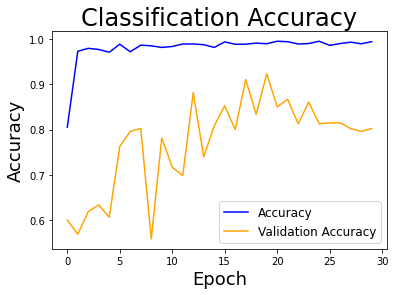

In [11]:
#plt.subplot(211)
#plt.plot(ep.history['loss'], color = 'blue', label = 'train')
#plt.plot(ep.history['val_loss'], color = 'orange', label = 'test')
#plt.subplot(212)
plt.title('Classification Accuracy', fontsize = 24)
plt.plot(eptr.history['accuracy'], color = 'blue', label = 'train')
plt.plot(eptr.history['val_accuracy'], color = 'orange', label = 'test')
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.legend(['Accuracy', 'Validation Accuracy'], fontsize = 12)
plt.savefig("vggtransfer_esda_plot.png")

In [13]:
test_pred = transfer.predict(test_photos).astype(int)

In [14]:
acc = 0
incorrect = []
for i in range(len(test_pred)):
    if np.array_equiv(test_pred[i], test_cat[i]):
        acc += 1
    else:
        incorrect.append(img_files[i])
acc = acc/len(test_pred)
print(acc)

0.64
